In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image
from my_ml_tools.my_ml_plot import Plot_2d
from my_ml_tools.my_ml_plot import Plot_2d_decision

In [2]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [4]:
clf = LogisticRegression(penalty='l2', random_state=1)
clf.fit(X_train, y_train)

print(
    f'Train score: {clf.score(X_train, y_train):.3f}\n'
    f'Test score: {clf.score(X_test, y_test):.3f}')

Train score: 0.952
Test score: 0.974


In [5]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', random_state=1))

"""
# An alternative way for making Pipeline
pipe_lr = Pipeline([
    ('pca', PCA(n_components=2)),
    ('lr', LogisticRegression(penalty='l2', random_state=1))
])
"""

pipe_lr.fit(X_train, y_train)

print(
    f'Train score: {pipe_lr.score(X_train, y_train):.3f}\n'
    f'Test score: {pipe_lr.score(X_test, y_test):.3f}')

Train score: 0.949
Test score: 0.956


### Cross Validation

In [6]:
k_fold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(k_fold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(f'{k+1}-fold, Class dist.: {np.bincount(y_train[train])}, Acc.: {score:.3f}')
    
print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

1-fold, Class dist.: [153 256], Acc.: 0.978
2-fold, Class dist.: [153 256], Acc.: 0.935
3-fold, Class dist.: [153 256], Acc.: 0.957
4-fold, Class dist.: [153 256], Acc.: 0.935
5-fold, Class dist.: [153 256], Acc.: 0.913
6-fold, Class dist.: [153 257], Acc.: 0.956
7-fold, Class dist.: [153 257], Acc.: 0.933
8-fold, Class dist.: [153 257], Acc.: 0.956
9-fold, Class dist.: [153 257], Acc.: 0.933
10-fold, Class dist.: [153 257], Acc.: 0.956
CV accuracy: 0.945 +/- 0.018


In [7]:
scores = cross_val_score(estimator=pipe_lr,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1)

print(f'CV scores: {scores}\n')
print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV scores: [0.97826087 0.93478261 0.95652174 0.93478261 0.91304348 0.95555556
 0.93333333 0.95555556 0.93333333 0.95555556]

CV accuracy: 0.945 +/- 0.018


(0.0, 1.0, 0.0, 1.0)

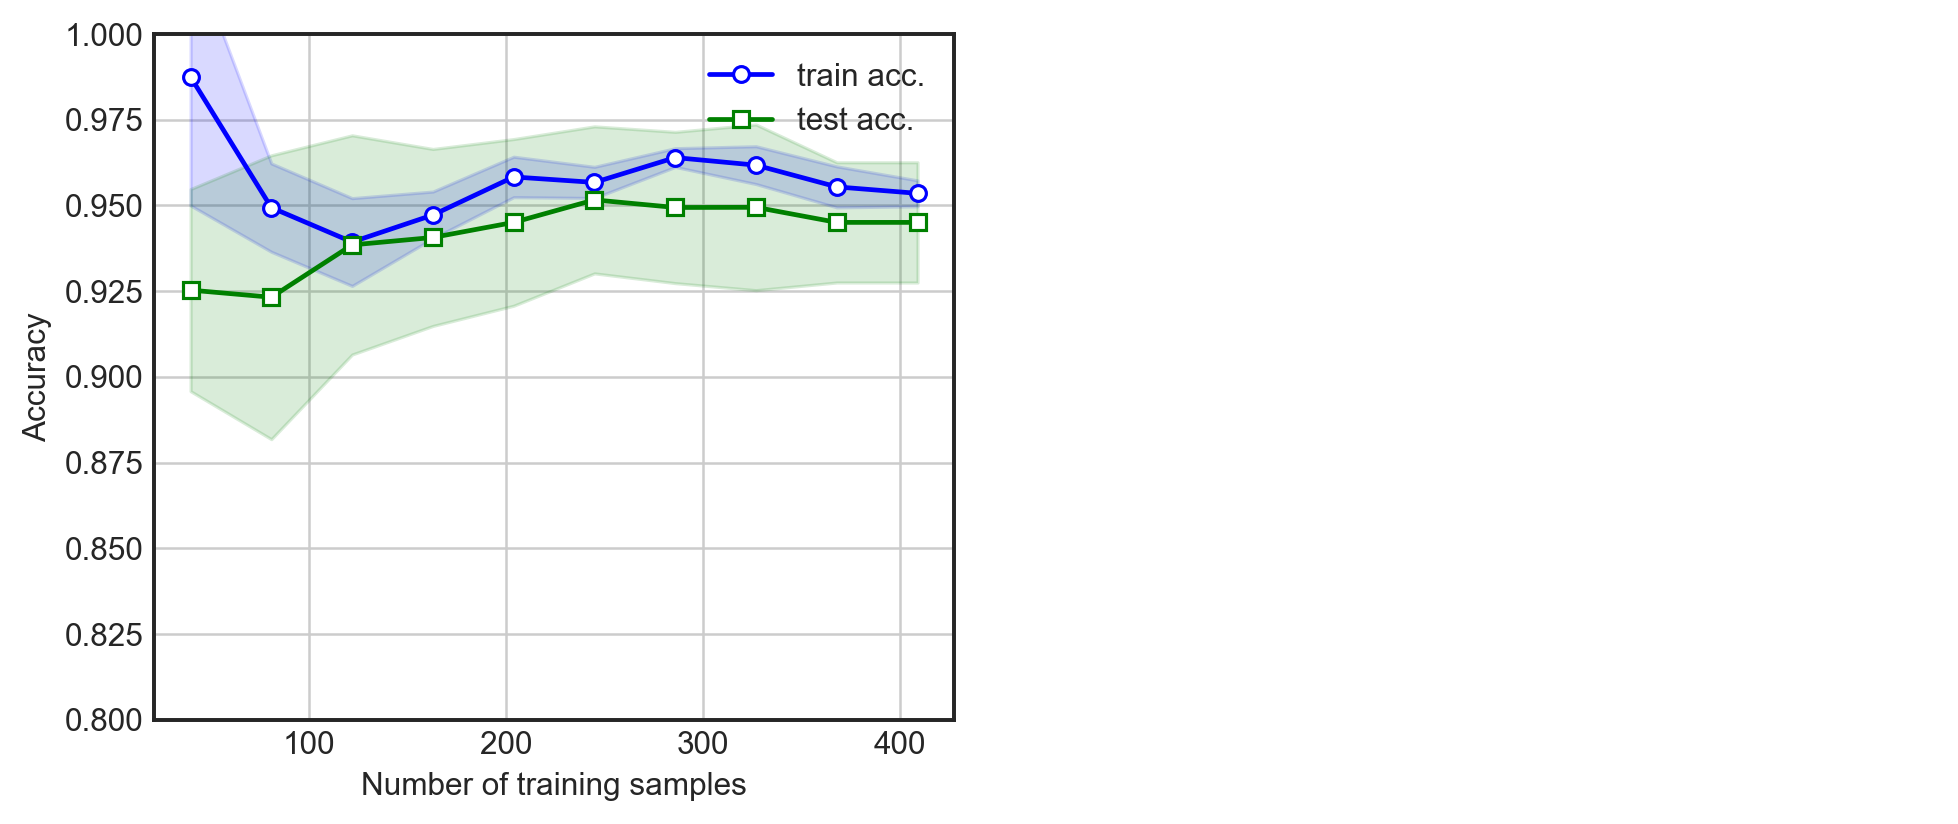

In [8]:
train_sizes, train_scores, test_scores =\
        learning_curve(estimator=pipe_lr,
                      X=X_train,
                      y=y_train,
                      train_sizes=np.linspace(0.1, 1, 10),
                      cv=10,
                      n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, mfc='w', label='train acc.')
axes[0].fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
axes[0].plot(train_sizes, test_mean, color='green', marker='s', markersize=5, mfc='w', label='test acc.')
axes[0].fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Number of training samples')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.8, 1])
axes[1].axis('off')

(0.0, 1.0, 0.0, 1.0)

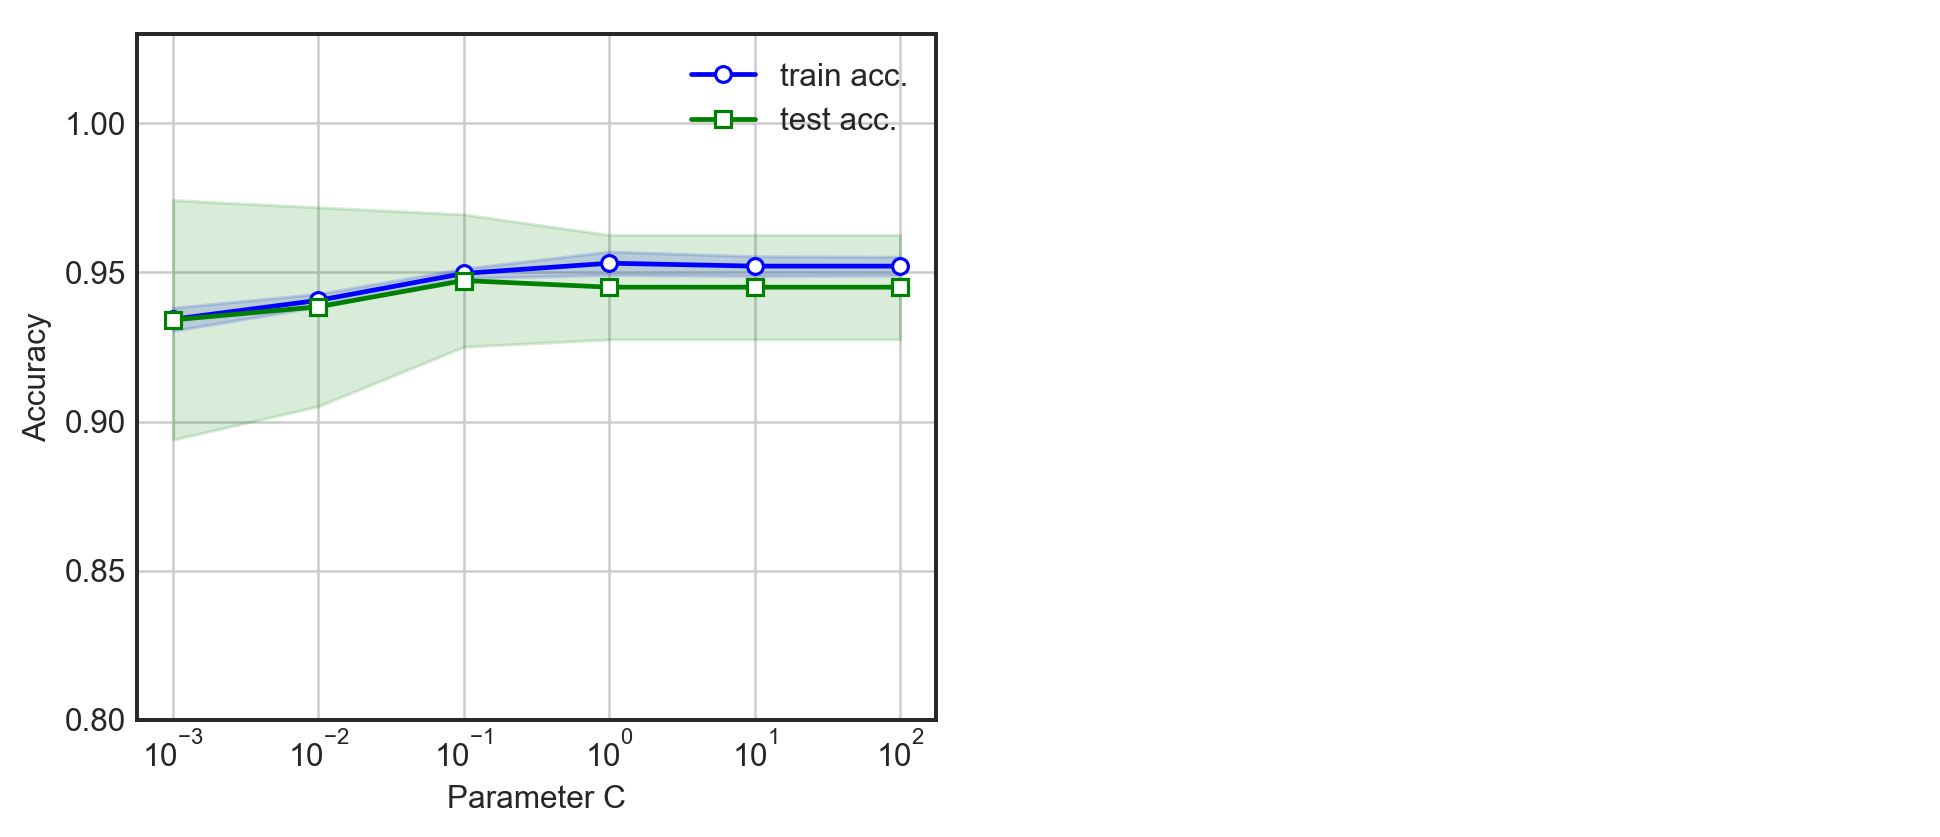

In [9]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(param_range, train_mean, color='blue', marker='o', markersize=5, mfc='w', label='train acc.')
axes[0].fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
axes[0].plot(param_range, test_mean, color='green', marker='s', markersize=5, mfc='w', label='test acc.')
axes[0].fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Parameter C')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.8, 1.03])
axes[0].set_xscale('log')
axes[1].axis('off')

In [10]:
estimator = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

param_range = [0.0001, 0.001, 0.01, 0.1,
              1, 10, 100, 1000]

param_grid = [
        {'svc__C': param_range,
        'svc__kernel': ['linear']},
    
        {'svc__C': param_range,
        'svc__gamma': param_range,
        'svc__kernel': ['rbf']}
]

gs = GridSearchCV(estimator=estimator,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs=-1)

gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.9736263736263736
{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])


#### Dataset
> Test set,   
> Train set:   
>> Validation set,    
>> Train set

In [11]:
gs = GridSearchCV(estimator=estimator,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=2,
                        n_jobs=-1
)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print(f'CV accuracy={np.mean(scores):.3f} +/- {np.std(scores):.3f}')

[0.95604396 0.96703297 0.98901099 0.96703297 0.97802198]
CV accuracy=0.971 +/- 0.011


In [12]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                          param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                          scoring='accuracy',
                          cv=2,
                          n_jobs=-1)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print(f'CV accuracy={np.mean(scores):.3f} +/- {np.std(scores):.3f}')

[0.94505495 0.94505495 0.91208791 0.93406593 0.92307692]
CV accuracy=0.932 +/- 0.013
